In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

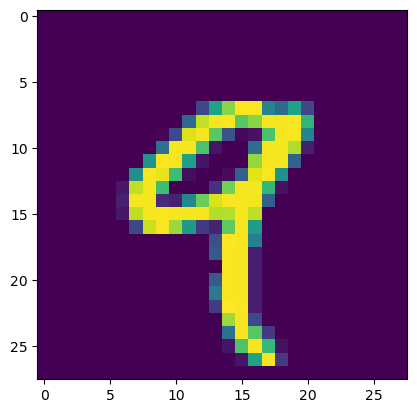

In [4]:
import matplotlib.pyplot as plt

simple_img = x_train[4]
plt.imshow(simple_img)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
from tensorflow.keras.utils import to_categorical

cata_ytrain = to_categorical(y_train, num_classes=10)
cata_ytest = to_categorical(y_test, num_classes=10)

In [7]:
cata_ytrain[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Example CNN structure
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# 🔧 This is the key line to fix your error
model.add(Flatten())

# Now this will produce shape (batch_size, 10)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience = 1)

history = model.fit(x_train, cata_ytrain, epochs=10, validation_data=(x_test, cata_ytest), callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 121s 52ms/step - accuracy: 0.8907 - loss: 0.3608 - val_accuracy: 0.9837 - val_loss: 0.0498
Epoch 2/10


In [ ]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)

In [ ]:
# The training loss — it shows how well the model is performing on the training data.
#The validation loss — it shows how well the model is performing on the validation data (data the model has not seen during training).

print("Metrics")
metrics

In [ ]:
plt.plot(metrics['loss'], label='Training Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.evaluate(x_test, cata_ytest, verbose=0)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

In [ ]:
print(f"Actual value is: {y_test} \n\n")
print(f"Predicted value is: {y_pred}")